In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scirpy as ir
from matplotlib import pyplot as plt, cm as mpl_cm
from cycler import cycler

sc.set_figure_params(figsize=(4, 4))
sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)

In [2]:
sc.logging.print_header()

scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.0 statsmodels==0.13.5 python-igraph==0.10.4 louvain==0.8.0 pynndescent==0.5.8


In [3]:
import warnings

warnings.filterwarnings(
    "ignore",
    ".*IProgress not found*",
)
warnings.simplefilter(action="ignore", category=FutureWarning)

import scanpy as sc
import scirpy as ir

import pandas as pd

warnings.simplefilter(action="ignore", category=pd.errors.DtypeWarning)

In [4]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
## r2py setup
import anndata2ri
import rpy2.rinterface_lib.callbacks
import logging
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

anndata2ri.activate()
%load_ext rpy2.ipython


In [5]:
import warnings

warnings.filterwarnings(
    "ignore",
    ".*IProgress not found*",
)
warnings.simplefilter(action="ignore", category=FutureWarning)

from palmotif import compute_motif, svg_logo
import scanpy as sc
import dandelion as ddl
import scirpy as ir
import pandas as pd
import numpy as np
import seaborn as sb

import os

import matplotlib as mpl
import matplotlib.pyplot as plt

warnings.simplefilter(action="ignore", category=pd.errors.DtypeWarning)

In [6]:
import os
os.chdir("/home/maolp/data5/Gaofeng_All_matrix/Allcount/")

In [7]:
adata1=sc.read_h5ad("./All_scanpyData/Data/Scanpy_merge_rmdoubulet_UMAP_label_lastCell.h5ad")

In [8]:
adata1[adata1.obs.Last_cell_type.str.contains(" B|-B")].obs.Last_cell_type.value_counts()

CXCR5+ Naïve B    26800
CXCR5- Naïve B     8381
Large pre-B        1099
Pro-B               850
Small pre-B         160
Name: Last_cell_type, dtype: int64

In [9]:
adata=sc.read_h5ad("./All_scanpyData/Data/Scanpy_lastCell_BCRall.h5ad")

In [10]:
adata

AnnData object with n_obs × n_vars = 31502 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2', 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR

In [11]:
adata.obs.Last_cell_type.value_counts()

CXCR5+ Naïve B    24602
CXCR5- Naïve B     6765
Large pre-B         113
Pro-B                13
Small pre-B           9
Name: Last_cell_type, dtype: int64

In [12]:
import pickle

F=open(r'./All_scanpyData/Data/Scanpy_lastCell_BCRall_vdjx.pkl','rb')

vdjx=pickle.load(F)

In [13]:
vdjx

Dandelion class object with n_obs = 31502 and n_contigs = 64661
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'c_call', 'consensus_count', 'duplicate_count', 'locus', 'cell_id', 'multi_chain', 'receptor_subtype', 'high_confidence', 'predicted_doublets', 'AdjustedID', 'Last_cell_type_num2', 'n_genes_by_counts', 'conf_score', 'Name', 'Cellname', 'doublet_scores', 'Last_cell_type_num', 'total_counts', 'n_genes', 'chain_pairing', 'receptor_type', 'is_cell', 'Week', 'TCRBCRlabel', 'predicted_labels', 'over_clustering', 'Last_cell_type', 'Cell_lineage', 'leiden', 'total_counts_mt', 'pct_counts_mt', 'Last_cell_type2', 'New_Body', 'majority_voting', 'rearrangement_status', 'junction_length', 'changeo_clone_id'
    metadata: 'changeo_clone_id', 'changeo_clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', '

In [14]:
adata.obs.changeo_clone_id_size.unique()

array([  1.,   3., 261.,   2.,   4.])

Transferring network
converting matrices
Updating anndata slots
 finished (0:00:26)


/data1/maolp/mamba/envs/Pyscan/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


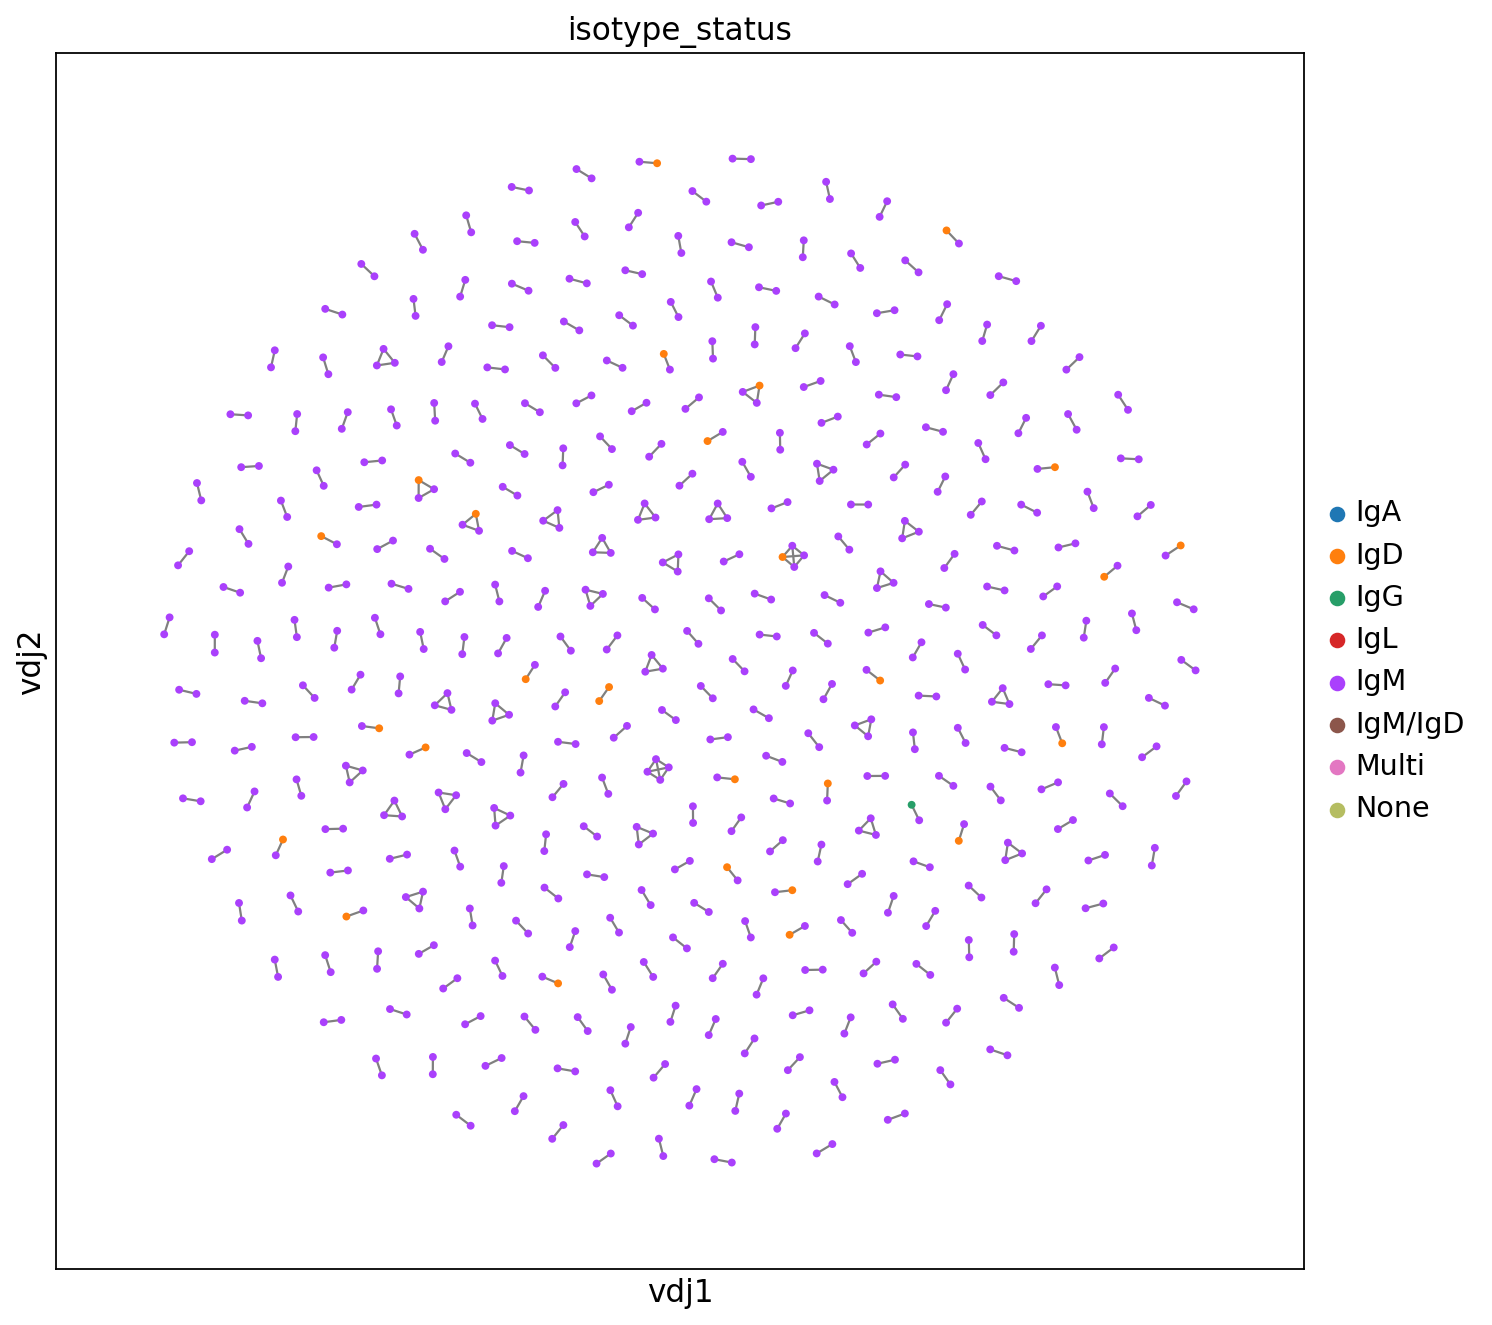

In [15]:
ddl.tl.transfer(adata, vdjx, clone_key="changeo_clone_id", expanded_only=True)

edgeweights = [
    1 / (e + 1) for e in ddl.tl.extract_edge_weights(vdjx)
]  # invert and add 1 to each edge weight (e) so that distance of 0 becomes the thickest edge
# therefore, the thicker the line, the shorter the edit distance.

sc.set_figure_params(figsize=[10, 10])
_ = ddl.pl.clone_network(
    adata,
    color=["isotype_status"],
    legend_fontoutline=3,
    edges_width=edgeweights,
    size=50,show=False
)
# plt.savefig("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Main_Figure5/Figure5D_isotype_status.pdf", bbox_inches='tight')

In [16]:
# ("./All_scanpyData/Data/Scanpy_lastCell_BCRall.h5ad")

In [17]:
adata

AnnData object with n_obs × n_vars = 31502 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2', 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR

In [18]:
Metadata=adata.obs
Metadata.to_csv('./All_scanpyData/BCRTCR/BCRobsmeta.csv')

In [19]:
%%R

meta=read.csv('./All_scanpyData/BCRTCR/BCRobsmeta.csv')
library(ggplot2)
# head(meta)

In [20]:
# ddl.tl.transfer(adata, vdjx, clone_key="changeo_clone_id", expanded_only=True)

# edgeweights = [
#     1 / (e + 1) for e in ddl.tl.extract_edge_weights(vdjx)
# ]  # invert and add 1 to each edge weight (e) so that distance of 0 becomes the thickest edge
# # therefore, the thicker the line, the shorter the edit distance.

# sc.set_figure_params(figsize=[10, 10])
# _ = ddl.pl.clone_network(
#     adata,
#     color=["isotype_status"],
#     legend_fontoutline=3,
#     edges_width=edgeweights,
#     size=50,
# )

In [21]:
%%R
# meta
colnames(meta)

  [1] "Cellname"                    "Name"                       
  [3] "doublet_scores"              "predicted_doublets"         
  [5] "predicted_labels"            "over_clustering"            
  [7] "majority_voting"             "conf_score"                 
  [9] "Cellname.1"                  "AdjustedID"                 
 [11] "New_Body"                    "Week"                       
 [13] "TCRBCRlabel"                 "n_genes"                    
 [15] "n_genes_by_counts"           "total_counts"               
 [17] "total_counts_mt"             "pct_counts_mt"              
 [19] "leiden"                      "Last_cell_type"             
 [21] "Cell_lineage"                "Last_cell_type2"            
 [23] "Last_cell_type_num"          "Last_cell_type_num2"        
 [25] "is_cell"                     "high_confidence"            
 [27] "multi_chain"                 "extra_chains"               
 [29] "IR_VJ_1_c_call"              "IR_VJ_2_c_call"             
 [31] "IR_

In [22]:
%%R
table(meta$c_call_B_VDJ)

 [1]     3     1     1   809     1     4    16     5     3 30405     9   239
[13]     2     4


In [23]:
%%R
names(table(meta$c_call_B_VDJ))

 [1] "IGHA1"      "IGHA1|IGHM" "IGHA2"      "IGHD"       "IGHD|IGHD" 
 [6] "IGHD|IGHM"  "IGHG1"      "IGHG2"      "IGHG3"      "IGHM"      
[11] "IGHM|IGHD"  "IGHM|IGHM"  "IGLC1"      "None"      


In [24]:
%%R
head(meta)
table(meta$isotype_status)

[1]     4   809    24     2 30405    13   241     4


In [37]:
%%R
names(table(meta$isotype_status))


[1] "IgA"     "IgD"     "IgG"     "IgM"     "IgM/IgD"


In [50]:
%%R
 A1<-prop.table(table(meta$isotype_status,meta$AdjustedID),2)*100
mean(A1[2,])

[1] 1.932718


In [42]:
%%R
head(meta)

                Cellname Name doublet_scores predicted_doublets
1 Z48_AAACCTGAGATAGGAG-1  Z48     0.06542056              False
2 Z48_AAATGCCCATATACGC-1  Z48     0.60220994              False
3 Z48_AACTGGTGTCCATGAT-1  Z48     0.04677846              False
4 Z48_ACAGCTACACATGGGA-1  Z48     0.02844639              False
5 Z48_ACATACGCACTCTGTC-1  Z48     0.08013937              False
6 Z48_ACCGTAAGTACCAGTT-1  Z48     0.04370180              False
  predicted_labels over_clustering majority_voting conf_score
1    Naive B cells             107   Naive B cells 0.86883147
2    Naive B cells             170   Naive B cells 0.09696008
3          B cells             262   Naive B cells 0.87033715
4    Naive B cells              26   Naive B cells 0.80236560
5    Naive B cells              96   Naive B cells 0.96328248
6    Naive B cells              64   Naive B cells 0.99718753
              Cellname.1 AdjustedID New_Body  Week TCRBCRlabel n_genes
1 Z48_AAACCTGAGATAGGAG-1   B17.4_P3     PBMC 19

3                None       IGLV1-44                        IGHV1-8
4                None       IGKV3-20                      IGHV7-4-1
5                None        IGKV1-9                       IGHV4-34
6                None       IGKV2-24                        IGHV3-9
  IR_VDJ_2_v_call has_ir receptor_type receptor_subtype chain_pairing
1                   True           BCR          IGH+IGL   single pair
2                   True           BCR          IGH+IGK   single pair
3                   True           BCR          IGH+IGL   single pair
4                   True           BCR          IGH+IGK   single pair
5                   True           BCR          IGH+IGK   single pair
6                   True           BCR          IGH+IGK   single pair
  changeo_clone_id changeo_clone_id_by_size locus_VDJ locus_VJ productive_VDJ
1       3479_19725                     1255       IGH      IGL           True
2      15202_19726                     1254       IGH      IGK           True
3   

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


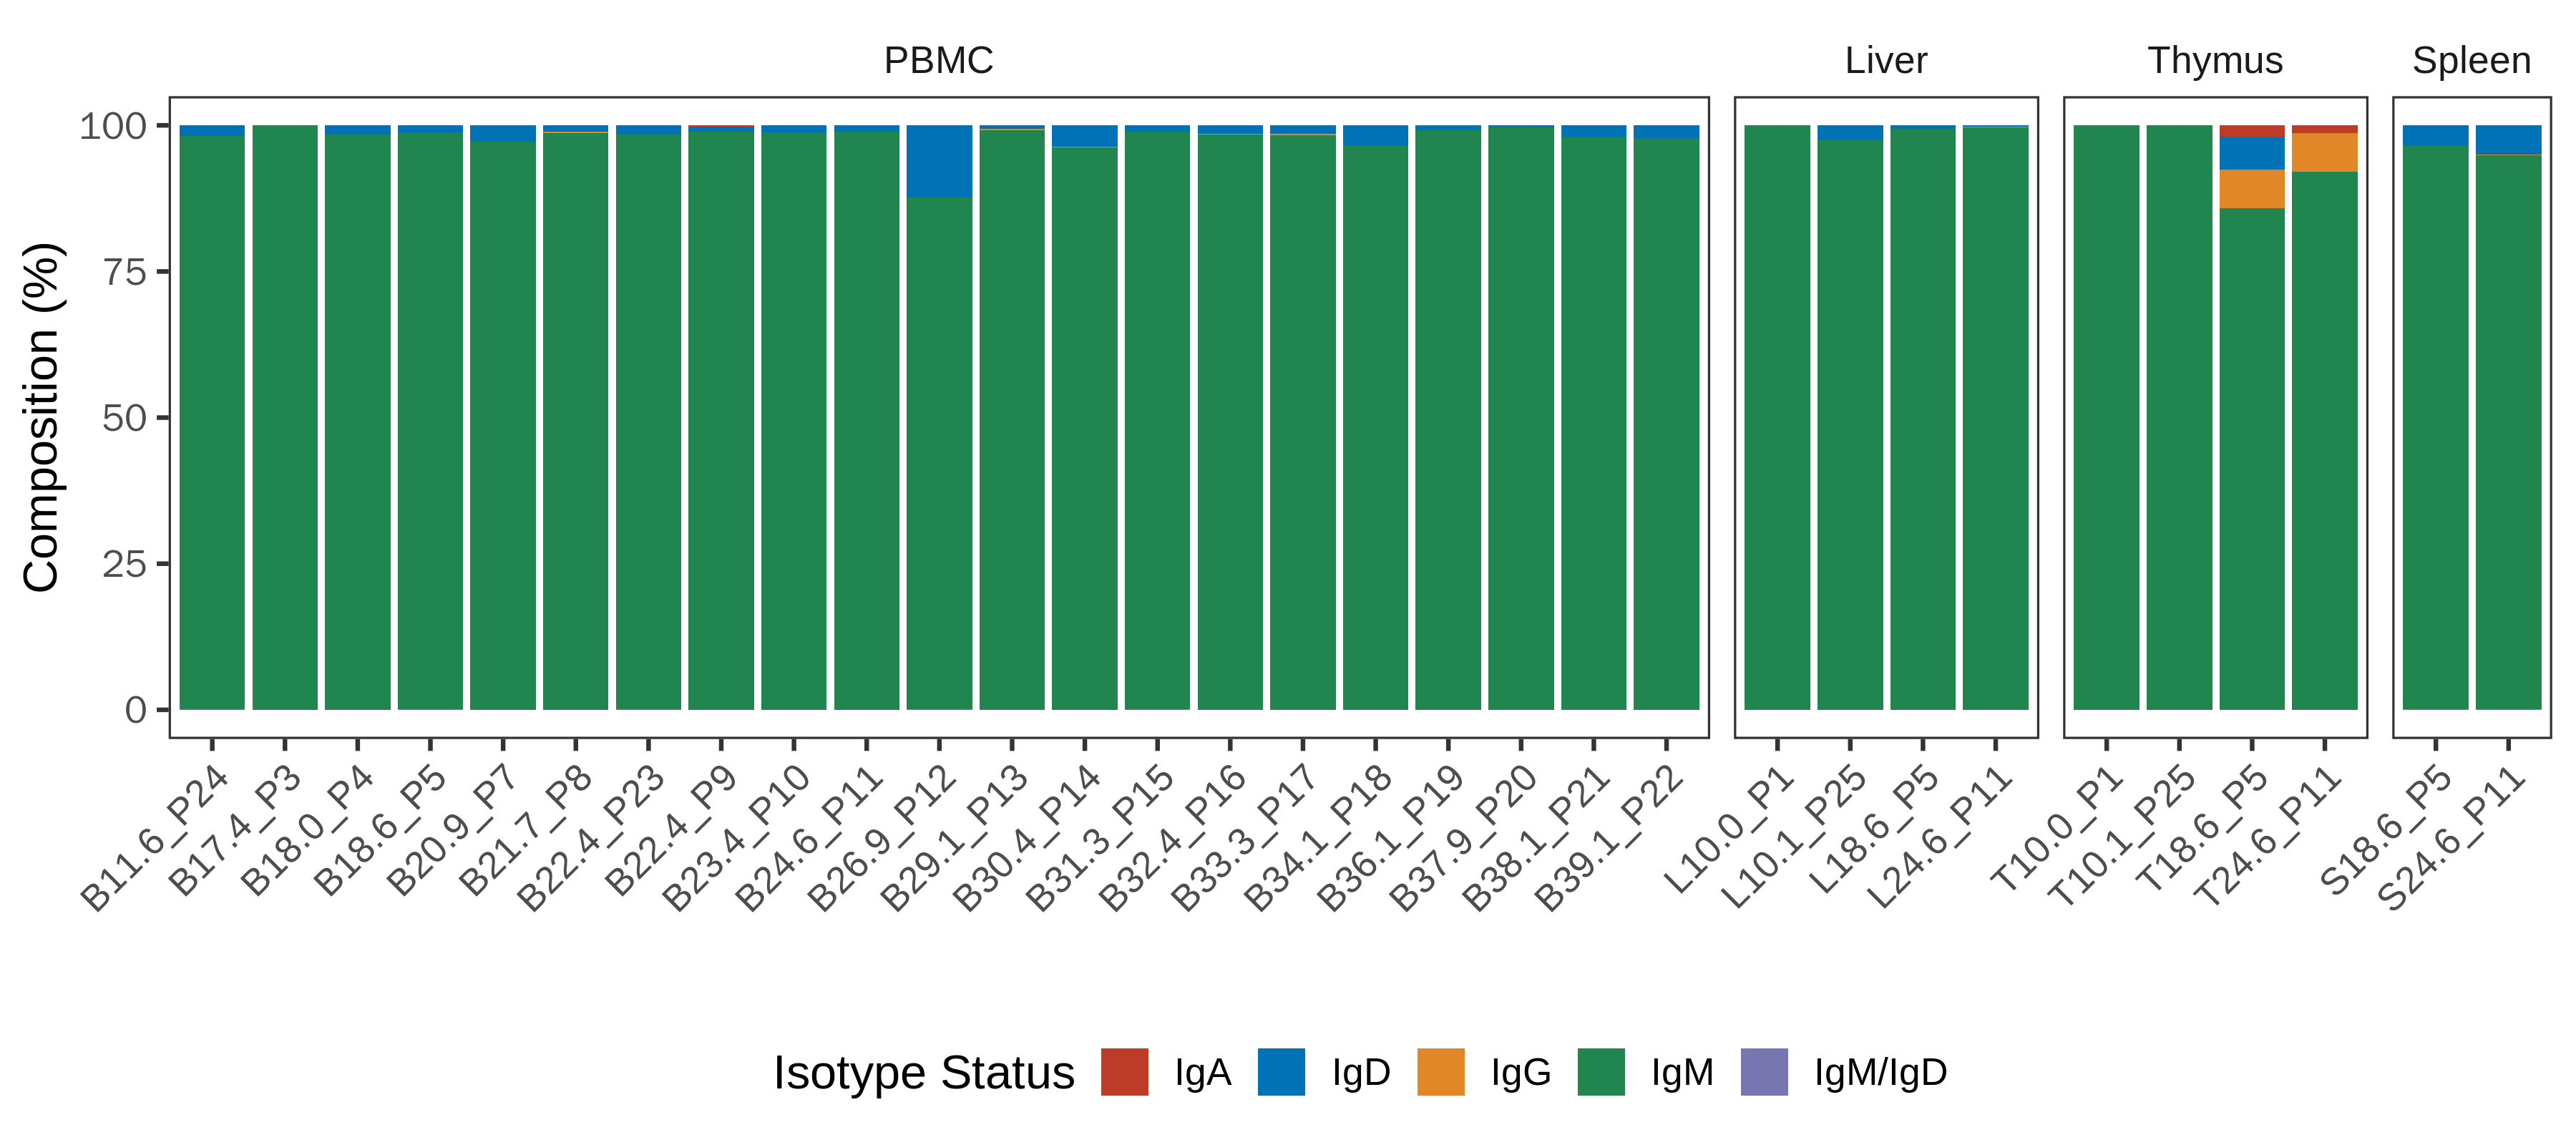

In [26]:
%%R -w 3600 -h 1600 -r 300
library(ggplot2)
library(ggsci)
library(tidyverse)
colorname2=c("#006D2C", "#B5AD64","#9DA8E2","#91C392","#FF9900","#46A040" , "#FFC179" ,"#98D9E9" ,"#F6313E", "#FFA300", "#333366", "#FF5A00", "#663366","#FF6666",
"#8F1336", "#0081C9", "#001588", "#CC0033","#CC9966","#CC0033","#999933","#009966","#CCCC33","#CCFF99","#333399","#993333")
meta<-subset(meta,isotype_status!='Multi') %>%subset(isotype_status!='None') %>%subset(isotype_status!='IgL')
meta$New_Body<-factor(meta$New_Body,level=c('PBMC','Liver','Thymus','Spleen'))
Px1=ggplot(meta, aes(fill=isotype_status, x=AdjustedID)) + 
  geom_bar(position="fill") +theme_classic()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x="Adjusted ID", y="Count", fill="Isotype Status")+
facet_grid(. ~ New_Body, space = "free", scales = "free", switch = "y") +
      scale_fill_nejm() +
  theme_bw(base_size = 16) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank(),
        legend.position = "bottom") +  # 将图例放在底部
  ylab("Composition (%)") +
  scale_y_continuous(labels = seq(0, 100, by = 25)) +
  xlab("")+labs(color="Cell_type")

ggsave(plot = Px1, filename ='/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Main_Figure5//FigureE_BCRF2_allISO.pdf', width = 12, height = 5)
Px1

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


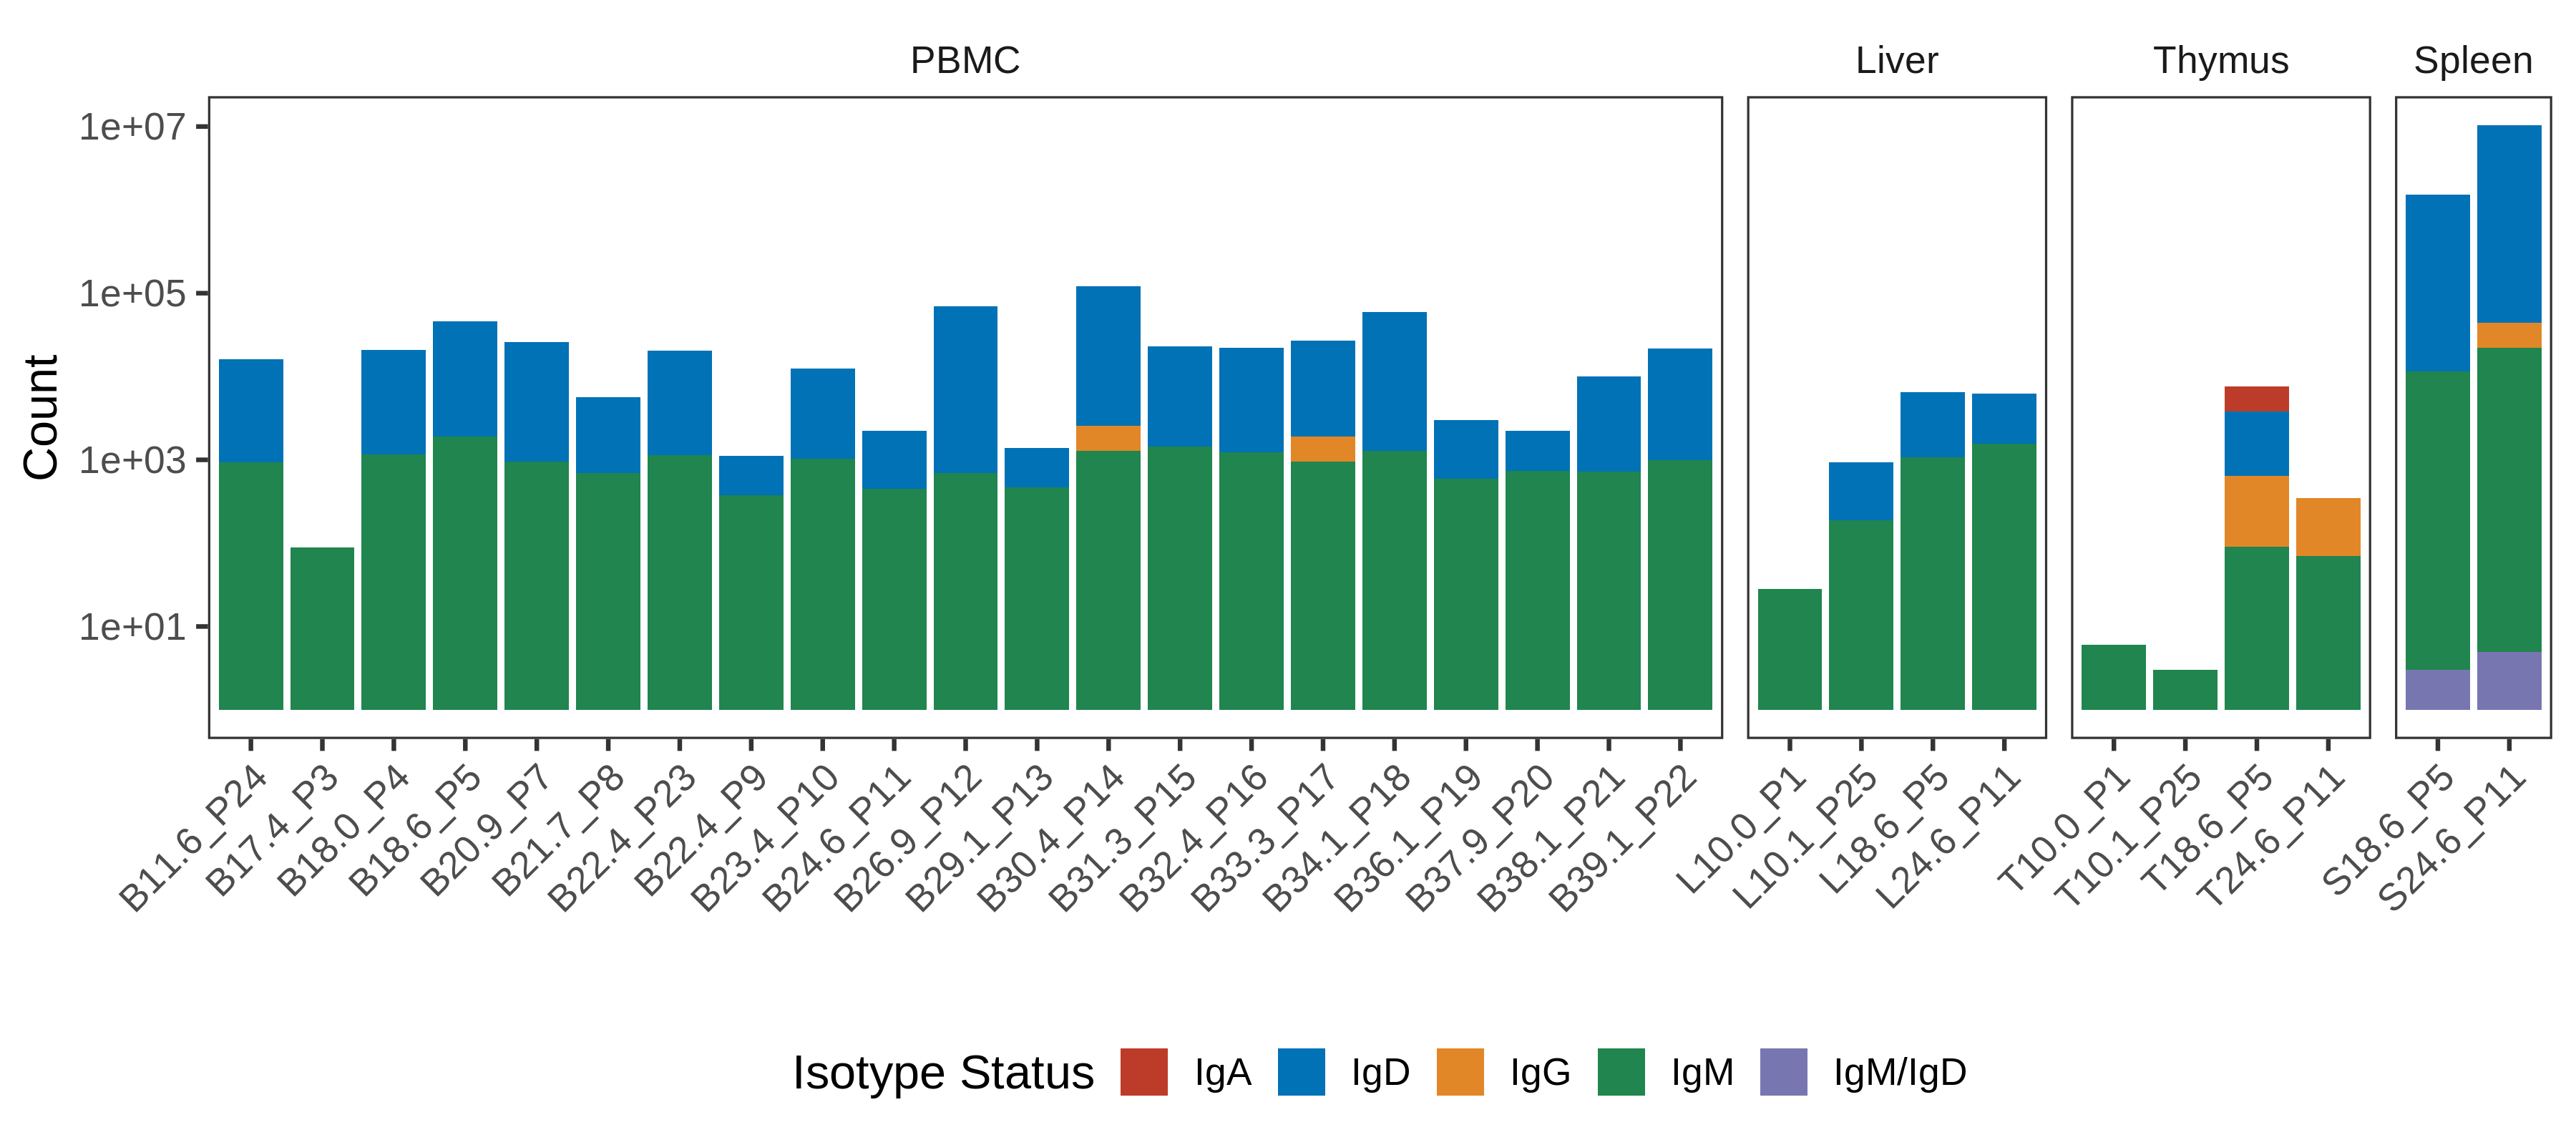

In [27]:
%%R -w 3600 -h 1600 -r 300
library(ggplot2)

colorname2=c("#006D2C", "#B5AD64","#9DA8E2","#91C392","#FF9900","#46A040" , "#FFC179" ,"#98D9E9" ,"#F6313E", "#FFA300", "#333366", "#FF5A00", "#663366","#FF6666",
"#8F1336", "#0081C9", "#001588", "#CC0033","#CC9966","#CC0033","#999933","#009966","#CCCC33","#CCFF99","#333399","#993333")
 Px2=ggplot(meta, aes(fill=isotype_status, x=AdjustedID)) + 
  geom_bar(position="stack") +theme_classic()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x="Adjusted ID", y="Count", fill="Isotype Status")+facet_grid(. ~ New_Body, space = "free", scales = "free", switch = "y") +
      scale_fill_manual(values = colorname2) +
  theme_bw(base_size = 16) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank(),
        legend.position = "bottom") + 

  xlab("")+labs(color="Cell_type")+scale_fill_nejm() +scale_y_log10() ### diff below

ggsave(plot = Px2, filename ='/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Main_Figure5//FigureE_BCRF2_allISO2.pdf', width = 12, height = 5)
 Px2

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


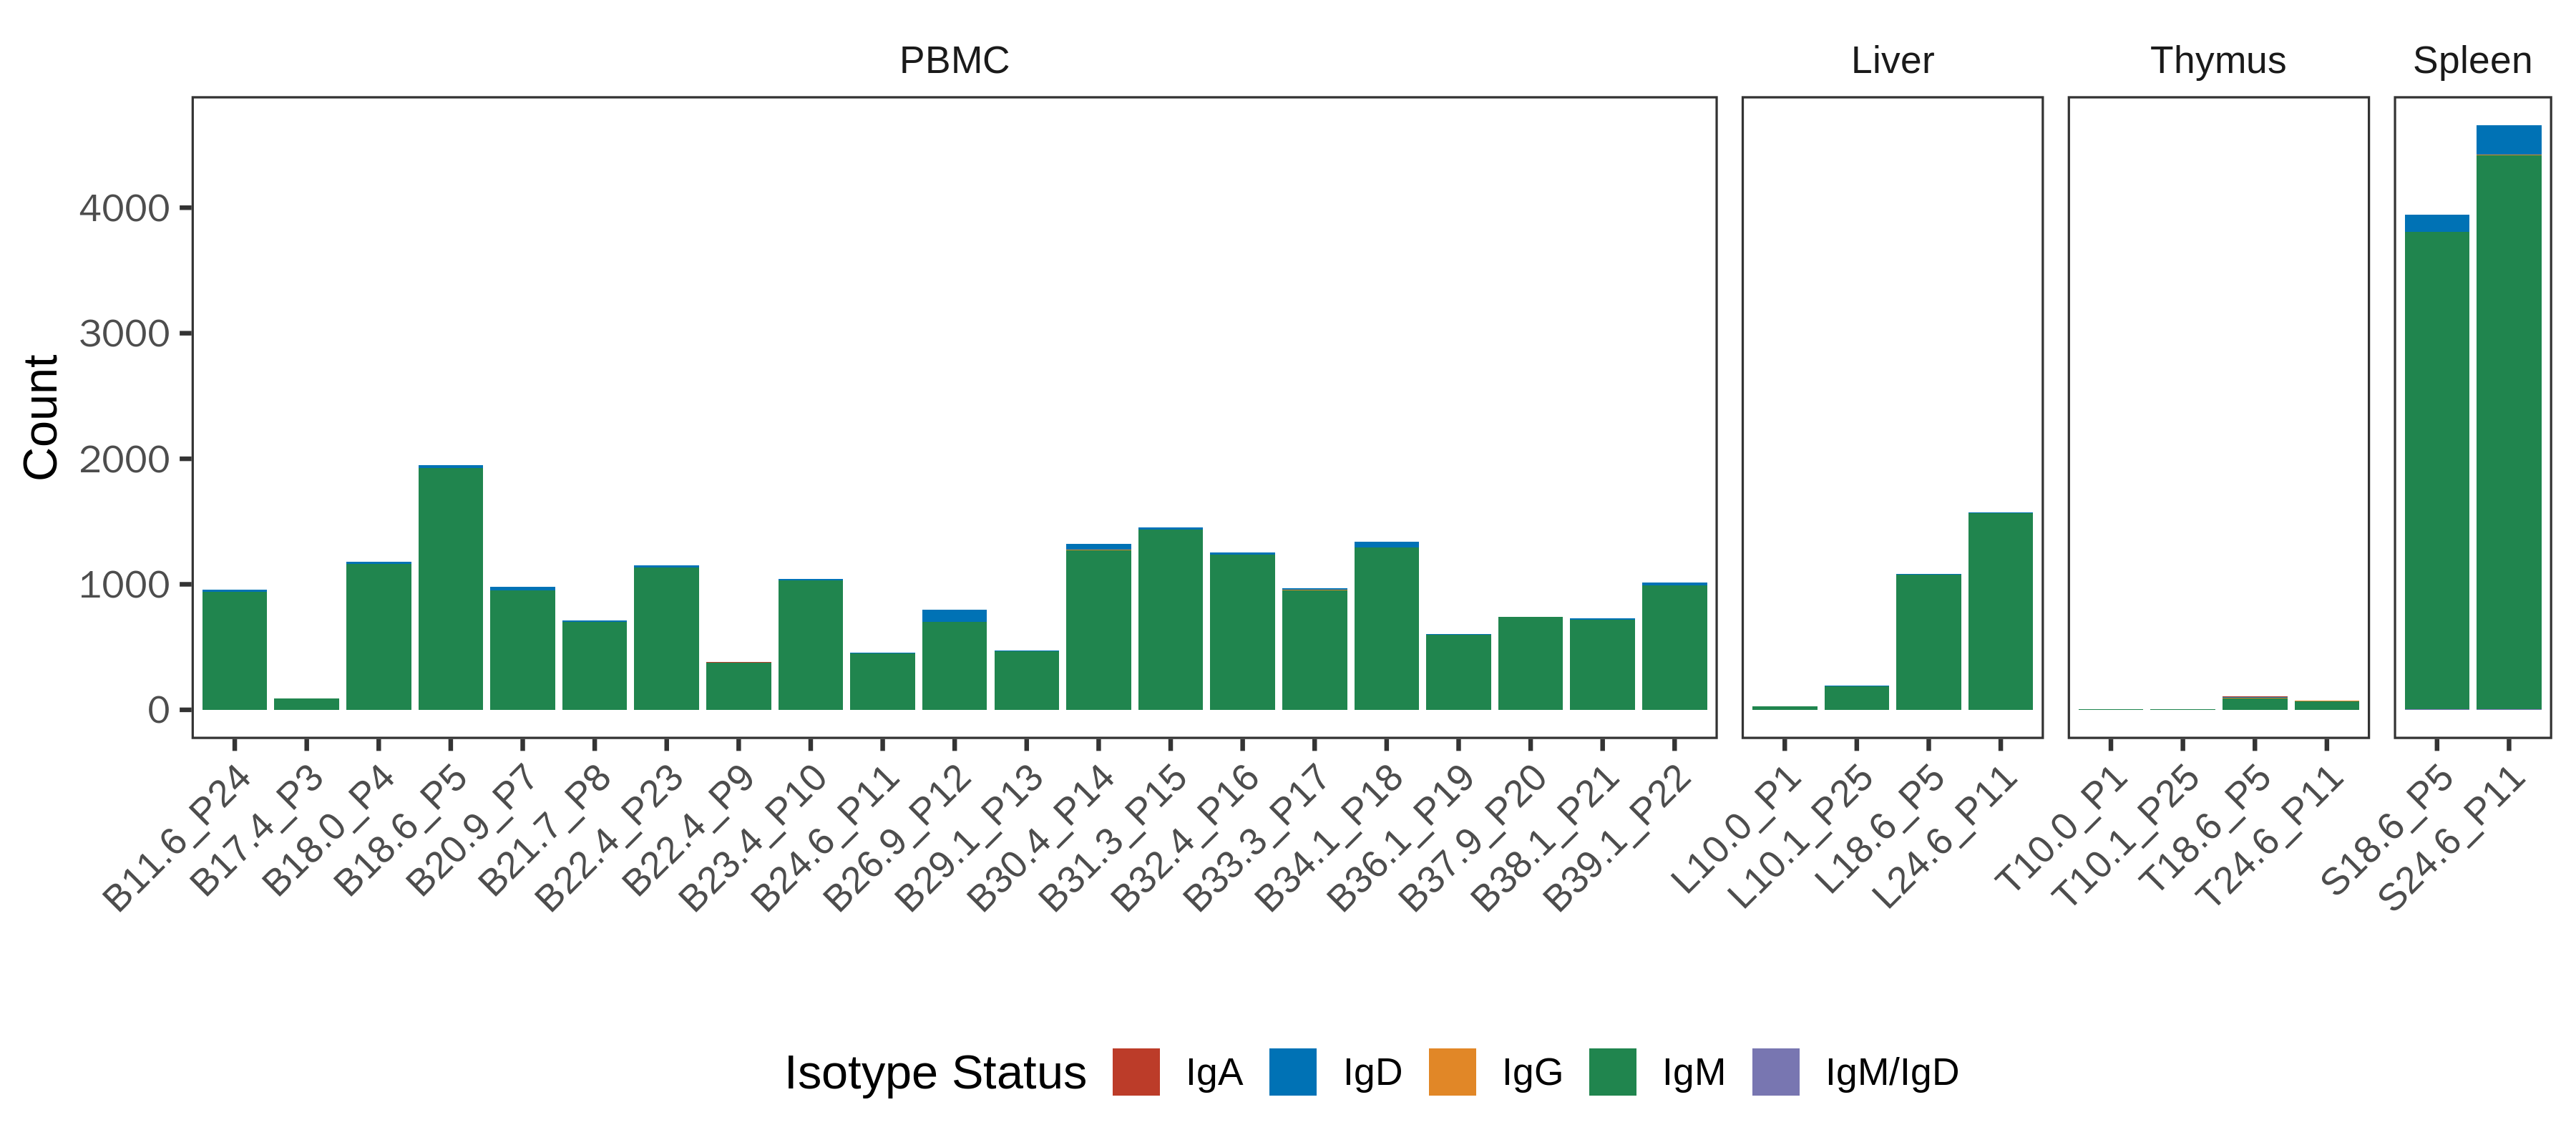

In [28]:
%%R -w 3600 -h 1600 -r 300
library(ggplot2)


# df <- your_dataframe
colorname2=c("#006D2C", "#B5AD64","#9DA8E2","#91C392","#FF9900","#46A040" , "#FFC179" ,"#98D9E9" ,"#F6313E", "#FFA300", "#333366", "#FF5A00", "#663366","#FF6666",
"#8F1336", "#0081C9", "#001588", "#CC0033","#CC9966","#CC0033","#999933","#009966","#CCCC33","#CCFF99","#333399","#993333")
 Px3=ggplot(meta, aes(fill=isotype_status, x=AdjustedID)) + 
  geom_bar(position="stack") +theme_classic()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x="Adjusted ID", y="Count", fill="Isotype Status")+facet_grid(. ~ New_Body, space = "free", scales = "free", switch = "y") +
      scale_fill_manual(values = colorname2) +
  theme_bw(base_size = 16) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank(),
        legend.position = "bottom") +  # 将图例放在底部

  xlab("")+labs(color="Cell_type")+scale_fill_nejm() 


ggsave(plot = Px3, filename ='/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Main_Figure5//FigureE_BCRF2_allISO2.pdf', width = 12, height = 5)
 Px3

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


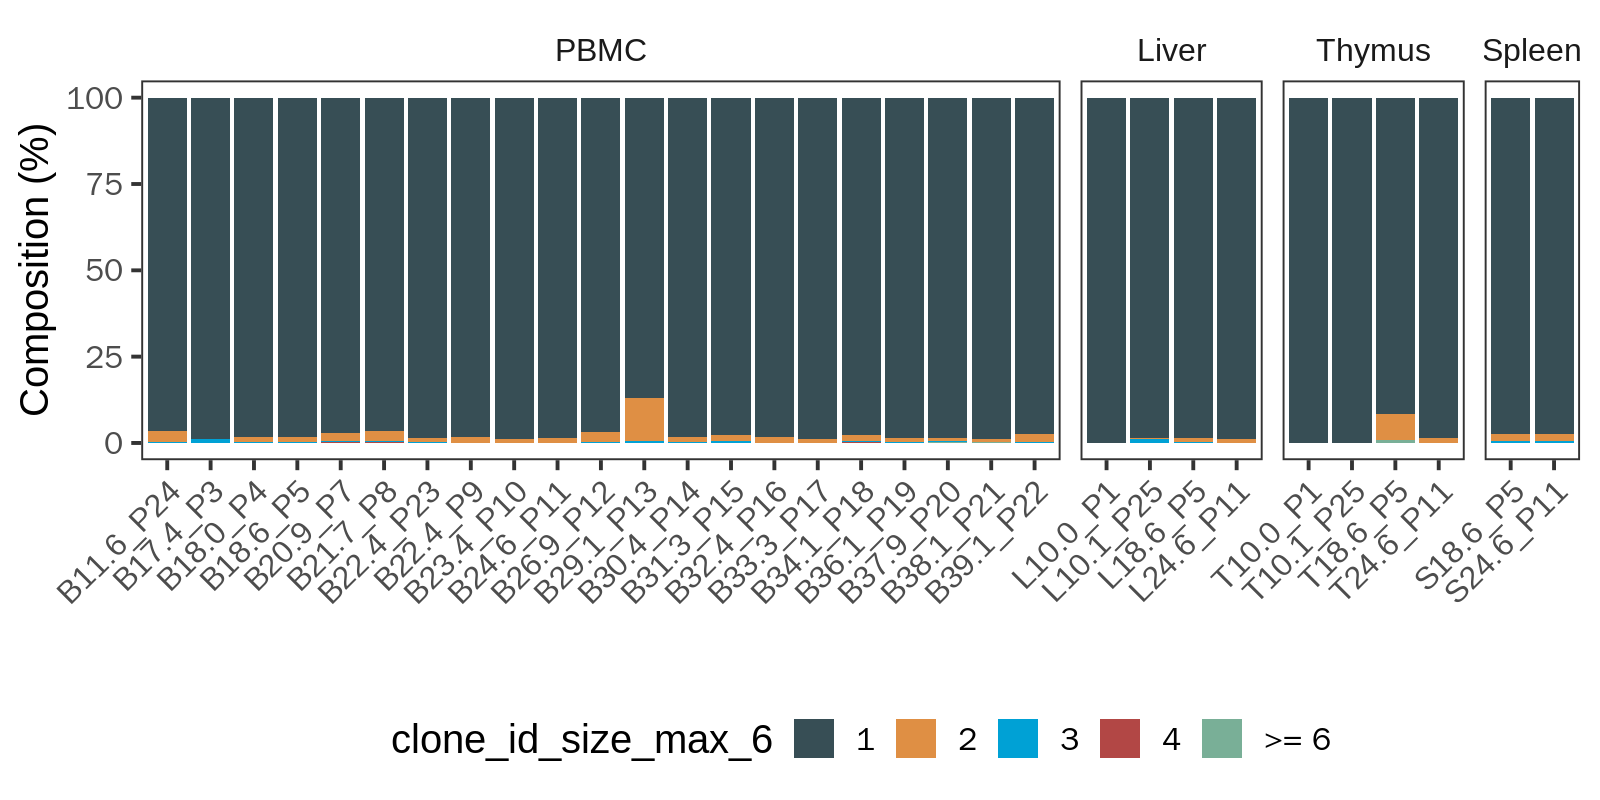

In [29]:
%%R -w 1600 -h 800 -r 180
library(ggplot2)

# 假设你的数据框名为df
# df <- your_dataframe
colorname2=c("#006D2C", "#B5AD64","#9DA8E2","#91C392","#FF9900","#46A040" , "#FFC179" ,"#98D9E9" ,"#F6313E", "#FFA300", "#333366", "#FF5A00", "#663366","#FF6666",
"#8F1336", "#0081C9", "#001588", "#CC0033","#CC9966","#CC0033","#999933","#009966","#CCCC33","#CCFF99","#333399","#993333")
meta$changeo_clone_id_size_max_6<-factor(meta$changeo_clone_id_size_max_6,levels=c("1","2","3","4","5",">= 6"))
P10=ggplot(meta, aes(fill=changeo_clone_id_size_max_6, x=AdjustedID)) + 
  geom_bar(position="fill") +theme_classic()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x="Adjusted ID", y="Count", fill="clone_id_size_max_6")+facet_grid(. ~ New_Body, space = "free", scales = "free", switch = "y") +
      scale_fill_manual(values = colorname2) +
  theme_bw(base_size = 16) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank(),
        legend.position = "bottom") +  # 将图例放在底部
  ylab("Composition (%)") +
  scale_y_continuous(labels = seq(0, 100, by = 25)) +
  xlab("")+labs(color="Cell_type")+scale_fill_jama()
ggsave(plot = P10, filename ='/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure5/S33/S33_FigureE_BCRF2_allISO.pdf', width = 12, height = 5)
P10


In [30]:

# sc.pl.umap(adata, color=["clonal_expansion"],palette={'1': '#868686', '2': '#145096', '>= 3': '#e9412f'},show=False)
# plt.savefig("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Main_Figure4/Figure4_TCR_clonal_expansion.pdf",bbox_inches='tight')

/data1/maolp/mamba/envs/Pyscan/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


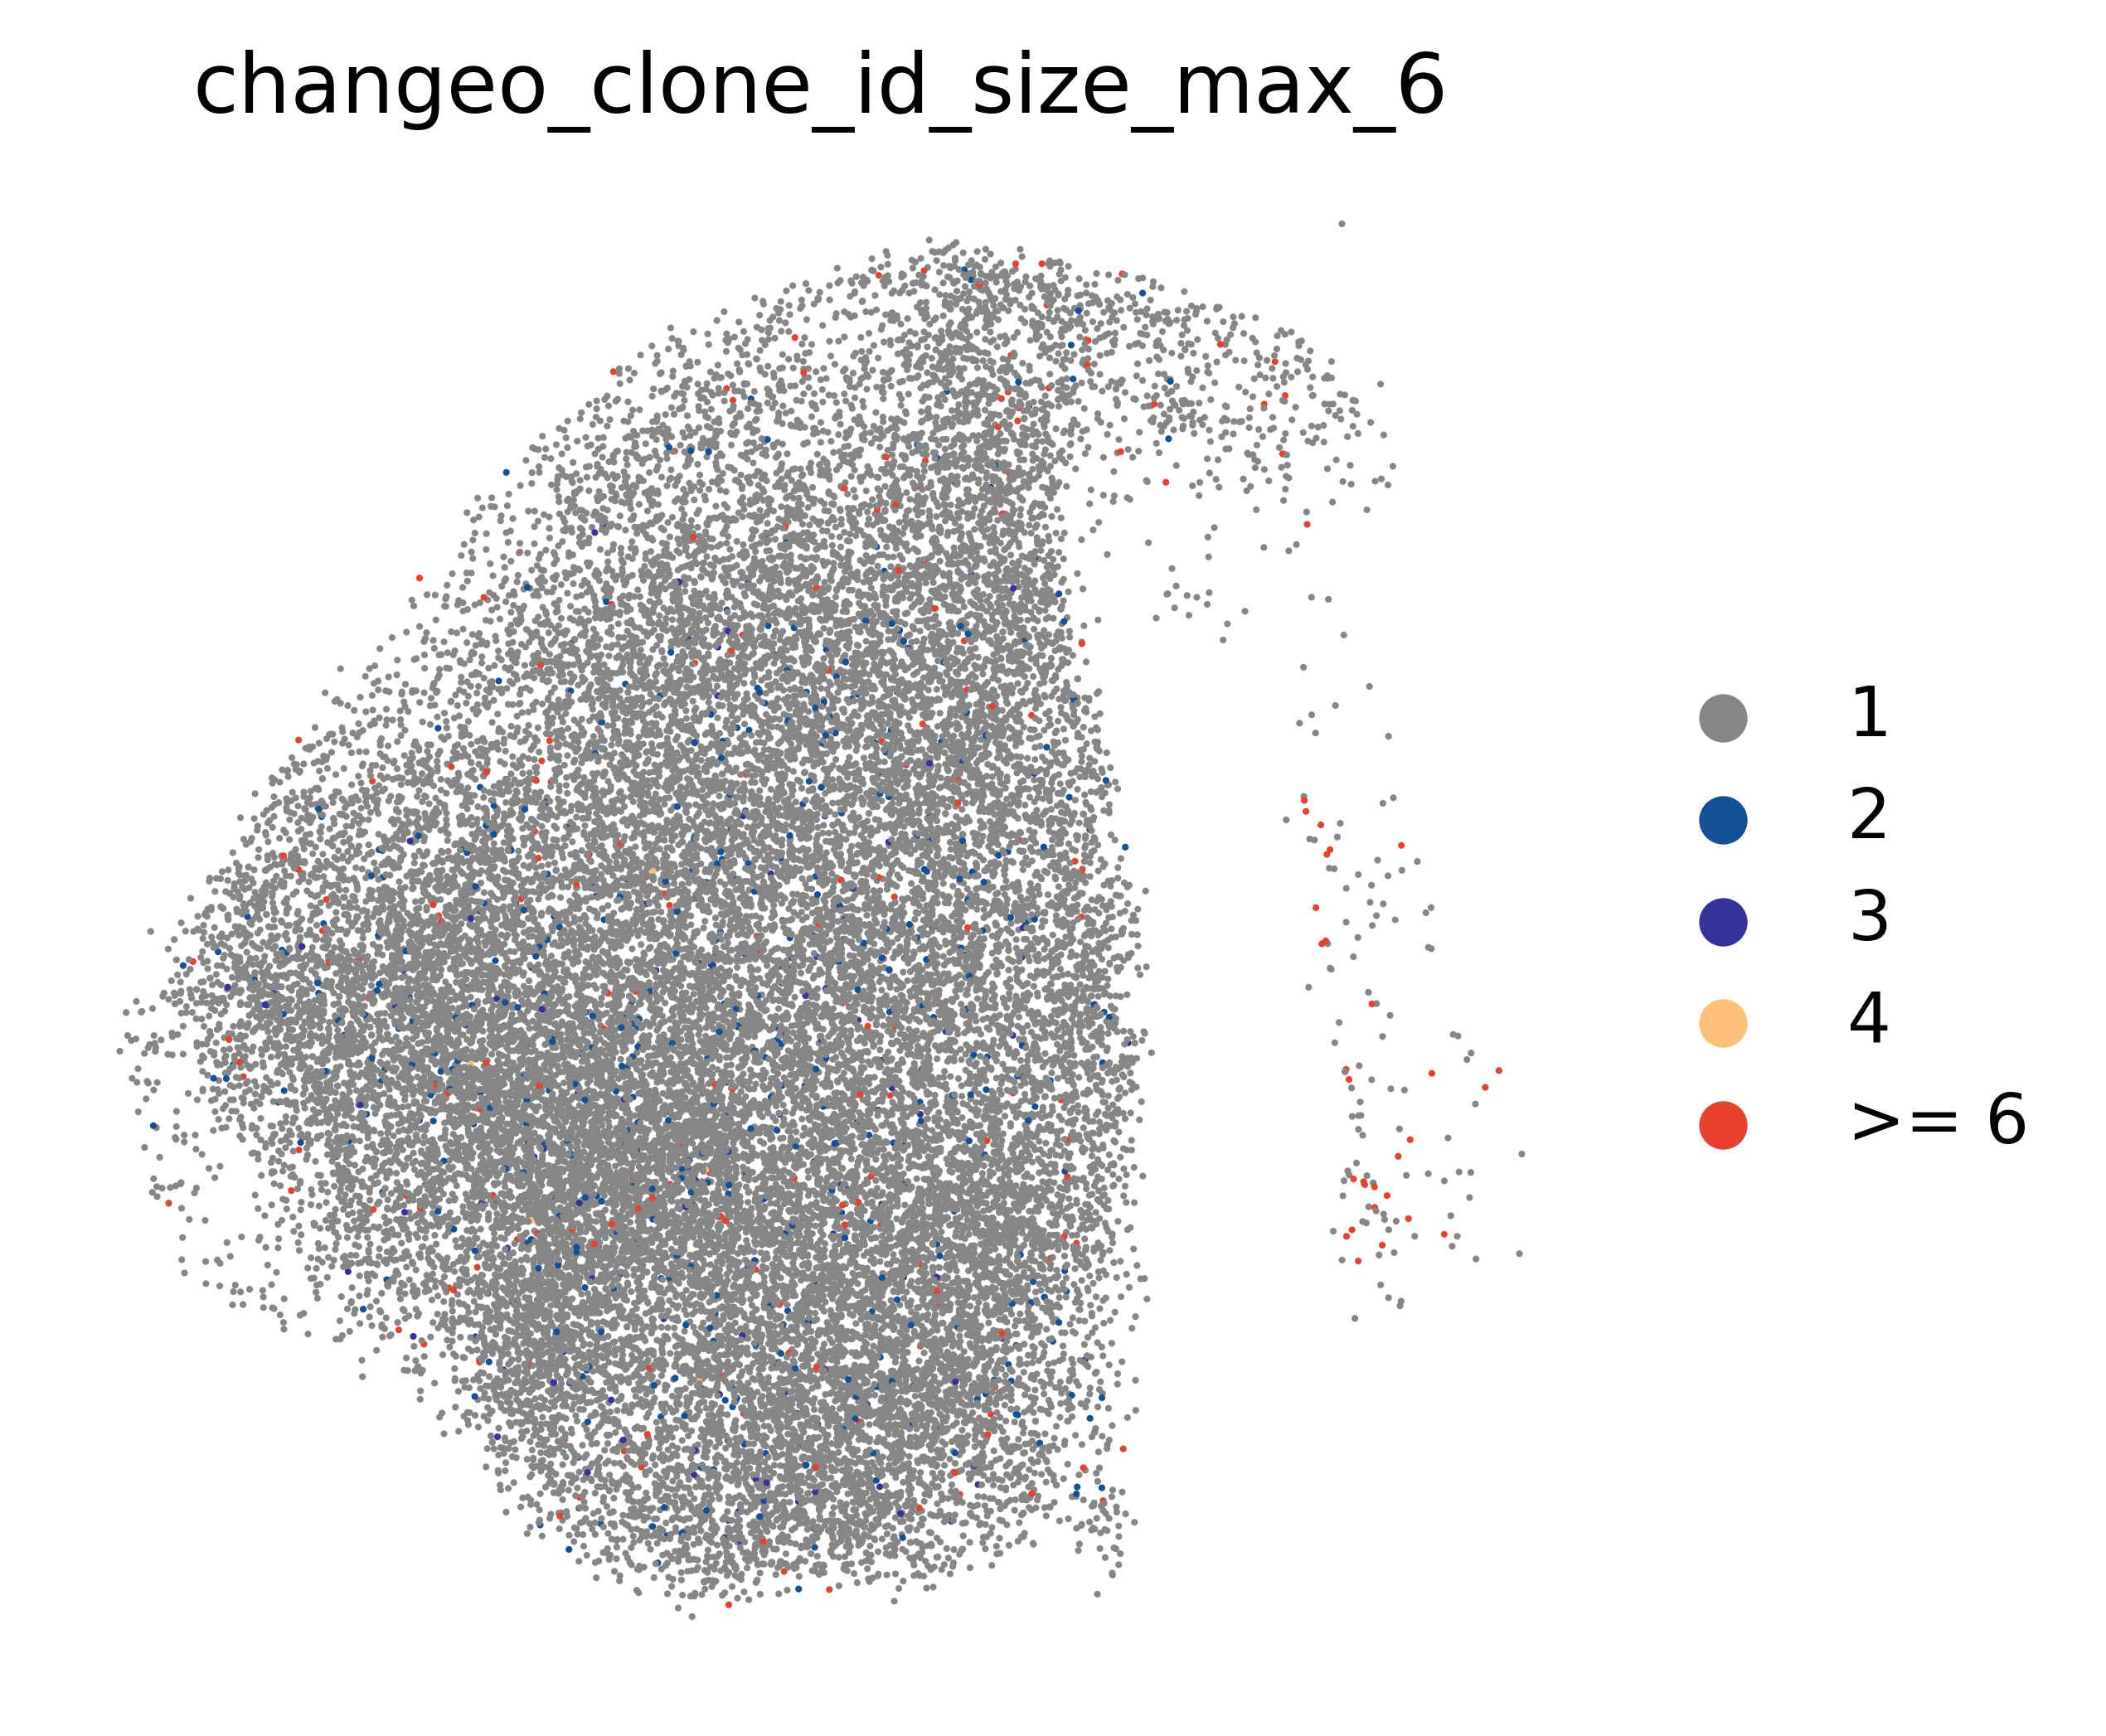

In [31]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 300
sc.pl.umap(adata, color="changeo_clone_id_size_max_6",palette={'1': '#868686', '2': '#145096', '3': '#333399','4':"#FFC179", '>= 6': '#e9412f'},show=False,frameon=False)
# plt.savefig("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Main_Figure5/Figure5C_BCR_allVDJ.pdf",bbox_inches='tight')
plt.savefig("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Main_Figure5/Figure5C_BCR_allVDJ_clone2024.pdf",bbox_inches='tight')

In [32]:
%%R
names(table(meta$isotype_status))

[1] "IgA"     "IgD"     "IgG"     "IgM"     "IgM/IgD"


In [33]:
%%R
table(meta$isotype_status)

[1]     4   809    24 30405    13


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


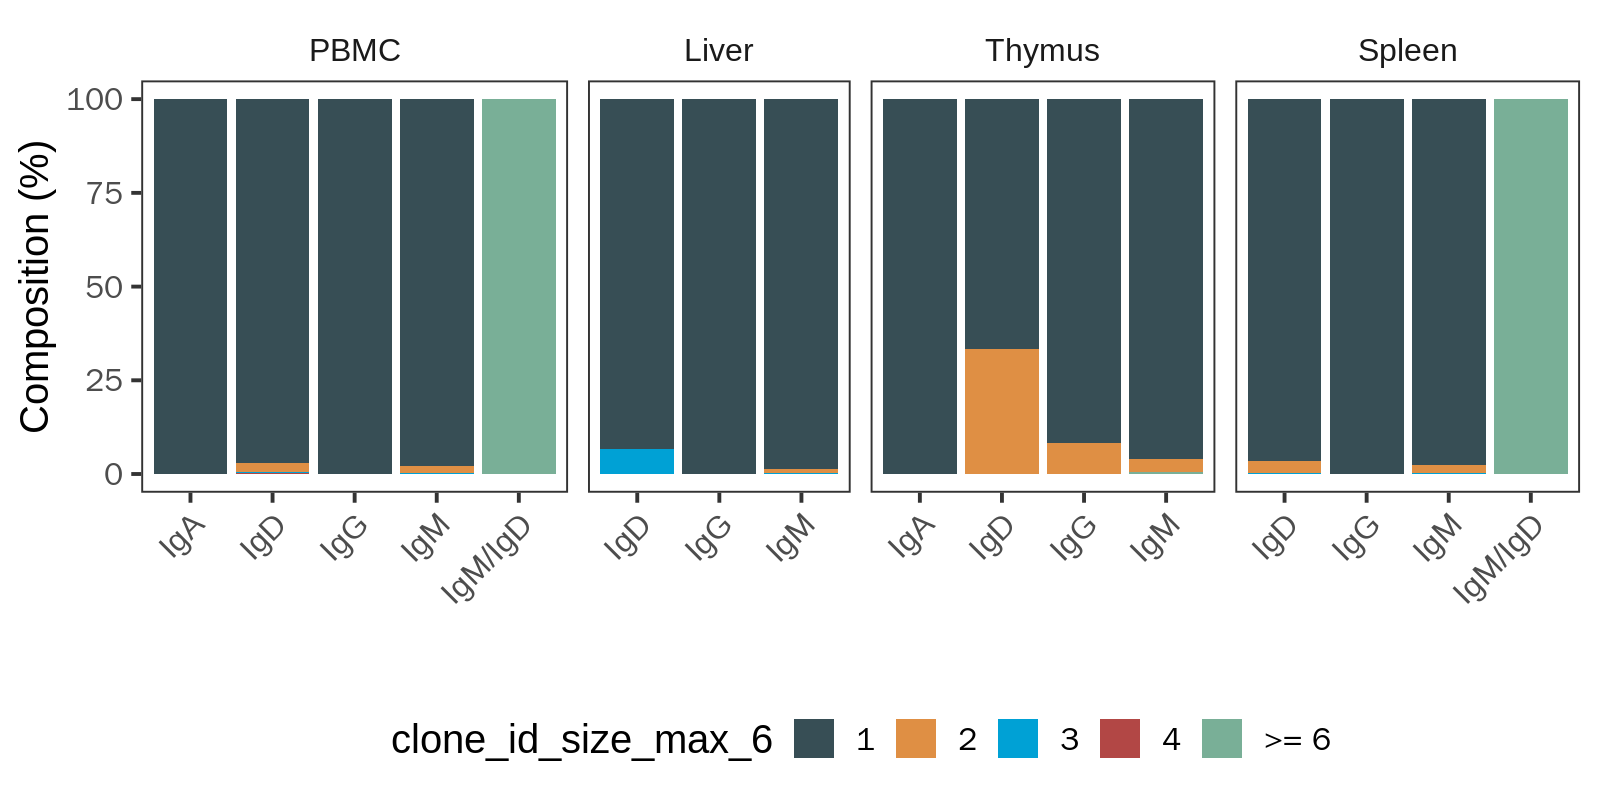

In [34]:
%%R -w 1600 -h 800 -r 180
library(ggplot2)

# 假设你的数据框名为df
# df <- your_dataframe
colorname2=c("#006D2C", "#B5AD64","#9DA8E2","#91C392","#FF9900","#46A040" , "#FFC179" ,"#98D9E9" ,"#F6313E", "#FFA300", "#333366", "#FF5A00", "#663366","#FF6666",
"#8F1336", "#0081C9", "#001588", "#CC0033","#CC9966","#CC0033","#999933","#009966","#CCCC33","#CCFF99","#333399","#993333")
meta$changeo_clone_id_size_max_6<-factor(meta$changeo_clone_id_size_max_6,levels=c("1","2","3","4","5",">= 6"))
P10=ggplot(subset(meta,isotype_status!="IgL"), aes(fill=changeo_clone_id_size_max_6, x=isotype_status)) + 
  geom_bar(position="fill") +theme_classic()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x="Adjusted ID", y="Count", fill="clone_id_size_max_6")+facet_grid(. ~ New_Body, space = "free", scales = "free", switch = "y") +
      scale_fill_manual(values = colorname2) +
  theme_bw(base_size = 16) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank(),
        legend.position = "bottom") +  
  ylab("Composition (%)") +
  scale_y_continuous(labels = seq(0, 100, by = 25)) +
  xlab("")+labs(color="Cell_type")+scale_fill_jama()
ggsave(plot = P10, filename ='/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure5/S33/S33_FigureE_BCRF2_allISO.pdf', width = 12, height = 5)
P10

In [35]:
adata

AnnData object with n_obs × n_vars = 31502 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2', 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR